In [ ]:
#Name : Alexander Daniel Román Gabriel

In [ ]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error
import seaborn as sns
import numpy as np

## READ THE DATA

In [ ]:
df = pd.read_excel('DataSet_Caracol_m.xlsx' , sheet_name= "DataSet") 
df.head()

,Sexo,Longitud,Diámetro,Altura,Peso total,Peso sin concha,Peso de las vísceras,Peso del caparazón,Anillos,Edad
0,H,0.705,0.555,0.195,1.7525,0.7105,0.4215,0.516,12,13.5
1,E,0.300,0.220,0.065,0.1195,0.0520,0.0155,0.035,5,6.5
2,E,0.545,0.400,0.130,0.6860,0.3285,0.1455,0.180,9,10.5
3,E,0.485,0.365,0.090,0.6510,0.3165,0.1320,0.180,8,9.5
4,E,0.475,0.360,0.110,0.4555,0.1770,0.0965,0.145,9,10.5


In [ ]:
df.columns

Index(['Sexo', 'Longitud', 'Diámetro', 'Altura', 'Peso total',
       'Peso sin concha', 'Peso de las vísceras', 'Peso del caparazón',
       'Anillos', 'Edad'],
      dtype='object')

## DATA ANALYSIS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3177 entries, 0 to 3176
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sexo                  3177 non-null   object 
 1   Longitud              3177 non-null   float64
 2   Diámetro              3177 non-null   float64
 3   Altura                3177 non-null   float64
 4   Peso total            3177 non-null   float64
 5   Peso sin concha       3177 non-null   float64
 6   Peso de las vísceras  3177 non-null   float64
 7   Peso del caparazón    3177 non-null   float64
 8   Anillos               3177 non-null   int64  
 9   Edad                  3177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 248.3+ KB


In [ ]:
df.describe()

,Longitud,Diámetro,Altura,Peso total,Peso sin concha,Peso de las vísceras,Peso del caparazón,Anillos,Edad
count,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000
mean,0.524092,0.407814,0.139583,0.828054,0.359249,0.180199,0.238699,9.936733,11.436733
std,0.119888,0.099262,0.042230,0.491111,0.221894,0.109916,0.139551,3.210905,3.210905
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.444000,0.186500,0.092000,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.796000,0.335000,0.170000,0.230000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.150000,0.499500,0.250000,0.330000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.348500,0.760000,1.005000,29.000000,30.500000


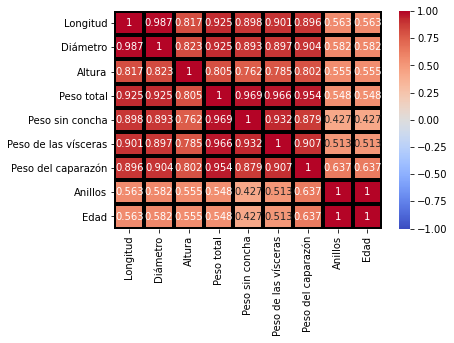

In [ ]:
#Correlation
sns.heatmap(df.corr() , annot = True , fmt = '.3g' , vmin = -1 , vmax = 1 , cmap = 'coolwarm' ,
            linewidths=3, linecolor='black')

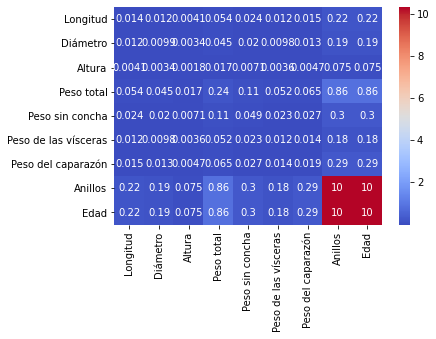

In [ ]:
#Covariance
sns.heatmap(df.cov() , annot = True , fmt = '.2g' , cmap = 'coolwarm')

In [ ]:
#I don't want Sexo column  . Then , I going to erase it
df.drop('Sexo', axis = 1)

,Longitud,Diámetro,Altura,Peso total,Peso sin concha,Peso de las vísceras,Peso del caparazón,Anillos,Edad
0,0.705,0.555,0.195,1.7525,0.7105,0.4215,0.516,12,13.5
1,0.300,0.220,0.065,0.1195,0.0520,0.0155,0.035,5,6.5
2,0.545,0.400,0.130,0.6860,0.3285,0.1455,0.180,9,10.5
3,0.485,0.365,0.090,0.6510,0.3165,0.1320,0.180,8,9.5
4,0.475,0.360,0.110,0.4555,0.1770,0.0965,0.145,9,10.5
...,...,...,...,...,...,...,...,...,...
3172,0.480,0.355,0.125,0.4940,0.2385,0.0835,0.150,9,10.5
3173,0.535,0.415,0.185,0.8415,0.3140,0.1585,0.300,15,16.5
3174,0.500,0.400,0.125,0.5975,0.2700,0.1275,0.166,9,10.5
3175,0.570,0.440,0.120,0.8030,0.3820,0.1525,0.234,9,10.5


## SPLIT THE DATA

In [ ]:
#Select your variables --> x : features variables , y : target variable
x = df[['Longitud', 'Diámetro', 'Altura', 'Peso total',
       'Peso sin concha', 'Peso de las vísceras', 'Peso del caparazón',
       'Anillos']]
y = df['Edad']

In [ ]:
#Split our datas on train data and test data
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

## USING LINEAR REGRESSION

In [ ]:
regression = LinearRegression()

#Train the model
regression.fit(x_train,y_train)

#predict with the model
edad_pred = regression.predict(x_test)

In [ ]:
edad_pred

array([14.5, 17.5, 10.5, 14.5,  9.5,  9.5,  7.5,  9.5, 14.5, 11.5, 11.5,
       16.5, 10.5,  8.5,  8.5, 11.5, 13.5,  8.5,  9.5,  6.5, 12.5, 12.5,
       10.5, 11.5, 10.5, 11.5, 12.5, 11.5, 18.5, 13.5, 13.5, 14.5,  8.5,
        9.5, 10.5,  6.5, 14.5,  9.5, 11.5, 10.5, 10.5,  9.5, 27.5,  8.5,
       12.5, 12.5, 11.5, 10.5, 13.5, 11.5, 12.5, 16.5, 11.5, 11.5, 11.5,
       10.5, 10.5, 11.5, 14.5,  9.5,  9.5, 11.5, 12.5, 10.5, 10.5, 15.5,
        9.5,  8.5,  9.5, 10.5, 17.5, 11.5,  7.5, 15.5,  9.5,  5.5,  7.5,
        9.5,  9.5,  9.5, 10.5, 10.5,  9.5, 10.5,  6.5,  8.5,  8.5,  9.5,
       14.5, 12.5,  9.5, 10.5, 10.5, 23.5,  7.5,  7.5, 13.5, 11.5, 11.5,
       11.5,  8.5, 12.5,  8.5, 13.5, 11.5, 10.5, 11.5, 11.5,  8.5, 11.5,
       12.5, 11.5, 11.5, 12.5, 10.5, 10.5, 12.5, 10.5,  7.5,  9.5, 10.5,
       11.5,  6.5,  9.5,  7.5, 11.5,  9.5, 10.5, 19.5,  9.5,  8.5,  5.5,
       12.5, 14.5, 10.5, 10.5, 11.5, 11.5, 14.5, 10.5,  6.5, 14.5,  9.5,
       13.5, 10.5, 10.5, 10.5, 10.5,  7.5, 11.5,  8

In [ ]:
y_test

916     14.5
1306    17.5
1432    10.5
1417    14.5
2741     9.5
        ... 
2620     9.5
71      15.5
2184    10.5
1573    14.5
867     19.5
Name: Edad, Length: 636, dtype: float64

## Visualization about it in a dataframe

In [ ]:
y_test_a = np.array(y_test)
df2 = pd.DataFrame(y_test_a , columns=['Real Data'])

In [ ]:
df2['Predict Data'] = edad_pred
df2.head() #Show only top 5 values

,Real Data,Predict Data
0,14.5,14.5
1,17.5,17.5
2,10.5,10.5
3,14.5,14.5
4,9.5,9.5


## COMMON ERRORS 

In [ ]:
#MAE
mae = mean_absolute_error(y_test , edad_pred)
mae

1.1172055593712267e-15

In [ ]:
#MSE
mse = mean_squared_error(y_test , edad_pred)
mse

3.18025056758911e-30

In [ ]:
rmse = mse ** 0.5
rmse

1.783325704292155e-15

## STATISTICAL SUMMARY

In [ ]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)

est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Edad   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.507e+31
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:13:12   Log-Likelihood:                 78390.
No. Observations:                2541   AIC:                        -1.568e+05
Df Residuals:                    2532   BIC:                        -1.567e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.5000 